### Graph Networks for the three targets

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import csv
from operator import itemgetter
from networkx.algorithms import community
from networkx import connected_components

import scipy.sparse as sp

In [2]:
df = pd.read_csv('data/df_full.csv')

In [6]:
from sklearn.impute import KNNImputer

In [7]:
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')

In [8]:
imputer.fit(df)

KNNImputer(weights='distance')

In [9]:
df_imp = imputer.transform(df)

In [10]:
df_imp = pd.DataFrame(data=df_imp, index=df.index, columns=df.columns)

In [23]:
df_imp.drop(columns=['record', 'age', 'sex', 'grade', 'race7', 
                     'bmi', 'sexid2'], inplace=True)

In [24]:
df_imp.isnull().sum()

q12    0
q15    0
q17    0
q23    0
q24    0
q25    0
q30    0
q41    0
q45    0
q58    0
q67    0
q77    0
q78    0
q79    0
q80    0
q82    0
q87    0
q88    0
dtype: int64

In [25]:
cols = df_imp.columns

In [26]:
X = sp.csr_matrix(df_imp.astype(int).values)

In [27]:
Xc = X.T * X

In [28]:
Xc.setdiag(0)

In [29]:
df = pd.DataFrame(Xc.todense(), index=cols, columns=cols)

In [30]:
df = df.stack().reset_index()

In [31]:
df.columns = ['source', 'target', 'weight']

In [32]:
g = nx.from_pandas_edgelist(df, 'source', 'target', ['weight'])


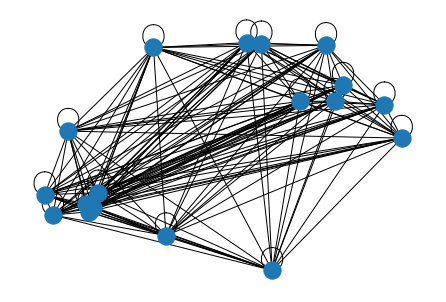

In [33]:
nx.draw(g)